# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [52]:
# Import all required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Reading the dataset
df= pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploring the dataset

In [54]:
df.shape

(768, 9)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [56]:
df.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [57]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [58]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [91]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### 0 ---> Non Diabetic 
### 1 ---> Diabetic

## There are no missing values in this dataset, while we can observe that there are a lot of zeros in BMI, Insulin, SkinThickness, Glucose and BloodPressure columns. There 0 value or close to 0 should be outliers.

In [59]:
for column_name in df.columns:
    zero_count = (df[column_name] == 0).sum()
    print(f"Number of zeros in column '{column_name}': {zero_count}")

Number of zeros in column 'Pregnancies': 111
Number of zeros in column 'Glucose': 5
Number of zeros in column 'BloodPressure': 35
Number of zeros in column 'SkinThickness': 227
Number of zeros in column 'Insulin': 374
Number of zeros in column 'BMI': 11
Number of zeros in column 'DiabetesPedigreeFunction': 0
Number of zeros in column 'Age': 0
Number of zeros in column 'Outcome': 500


# All the zeros should be null values expect Pregnancies, DiabetesPedigreeFunction and Outcome.

In [60]:
# Replace the 0's in cols with the average
cols = ['Glucose', 'BloodPressure', 'BMI']
for col in cols:
    df[col] = df[col].replace(0, df[col].mean())

In [62]:
# Replace the 0's in cols with the median
cols = ['Insulin', 'SkinThickness']
for col in cols:
    df[col] = df[col].replace(0, df[col].median())

In [65]:
# confirming that no colums has values that will skew our model
for column_name in df.columns:
    zero_count = (df[column_name] == 0).sum()
    print(f"Number of zeros in column '{column_name}': {zero_count}")

Number of zeros in column 'Pregnancies': 111
Number of zeros in column 'Glucose': 0
Number of zeros in column 'BloodPressure': 0
Number of zeros in column 'SkinThickness': 0
Number of zeros in column 'Insulin': 0
Number of zeros in column 'BMI': 0
Number of zeros in column 'DiabetesPedigreeFunction': 0
Number of zeros in column 'Age': 0
Number of zeros in column 'Outcome': 500


# VISUALIZATIONS

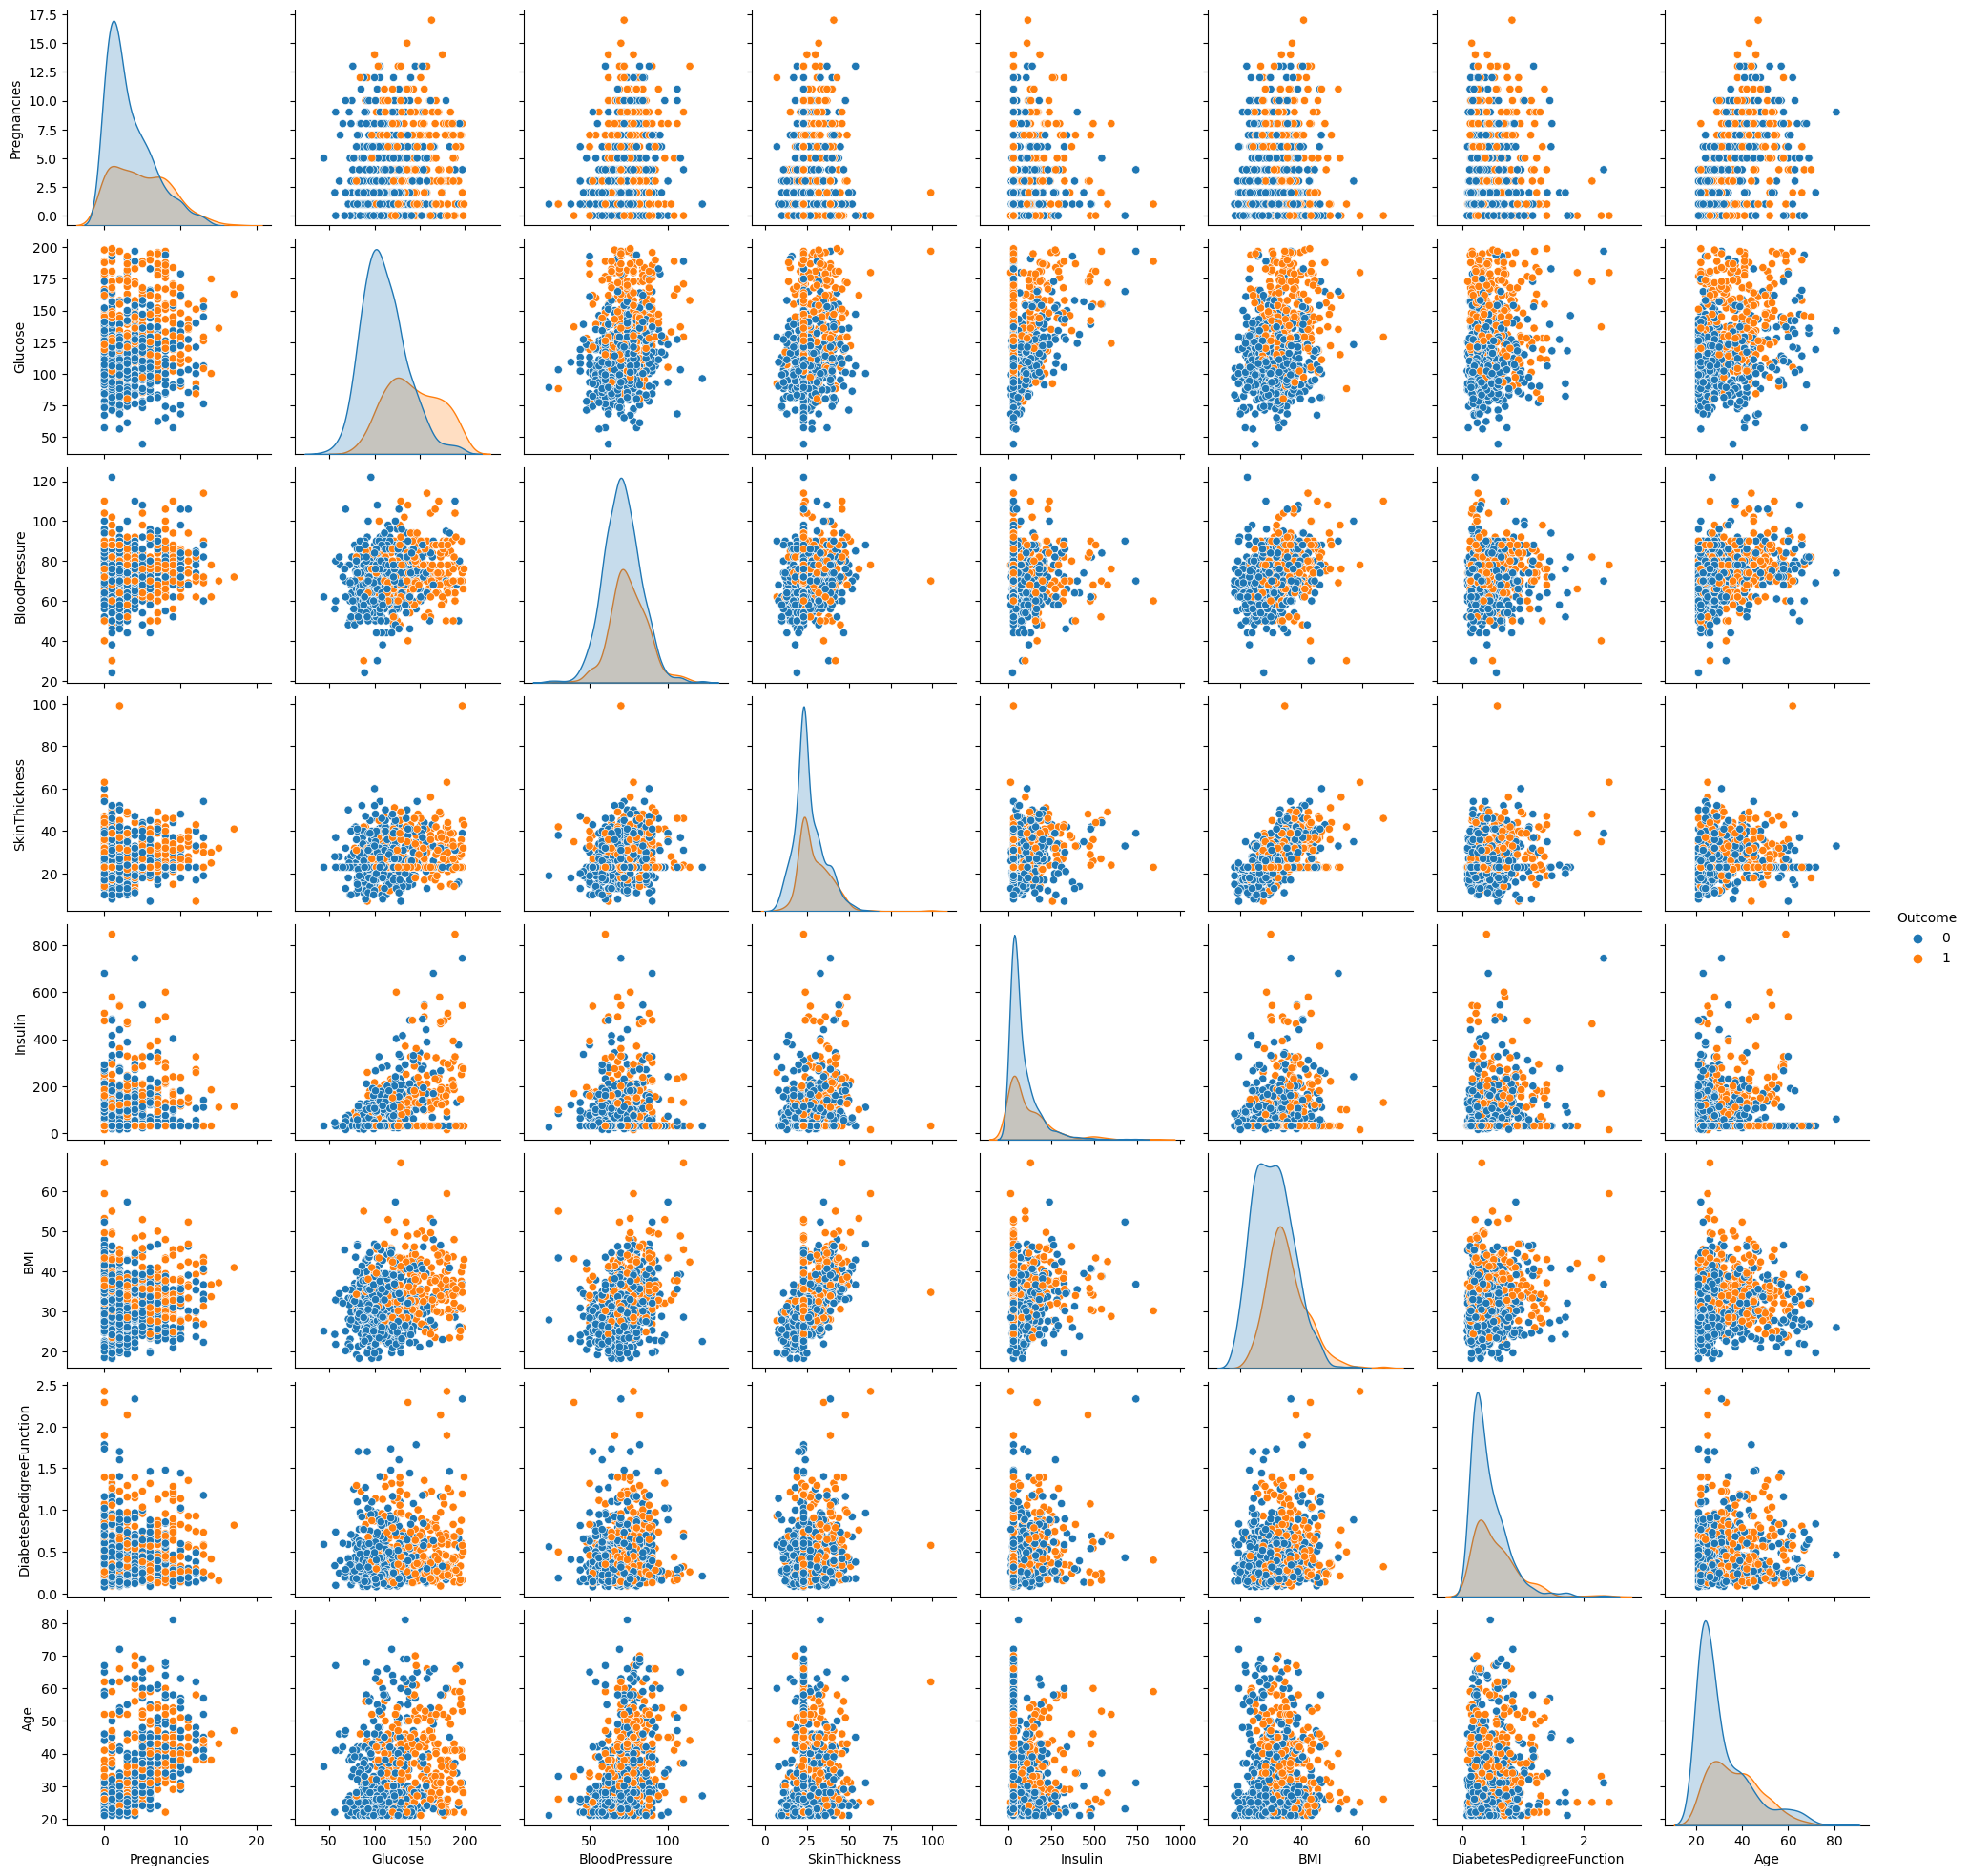

In [66]:
# Pairplot of all the feasures
sns.pairplot(data = df,hue ='Outcome')
plt.show()

In [68]:
# Examine the correlations of the dataset
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.172361,0.357081,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.152458,-0.022049,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.032568,0.172361,0.152458,1.000000,0.238188,0.546958,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357081,-0.022049,0.238188,1.000000,0.189031,0.178029,-0.015413,0.148457
BMI,0.021546,0.231478,0.281231,0.546958,0.189031,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.142977,0.178029,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.054514,-0.015413,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.189065,0.148457,0.312254,0.173844,0.238356,1.000000


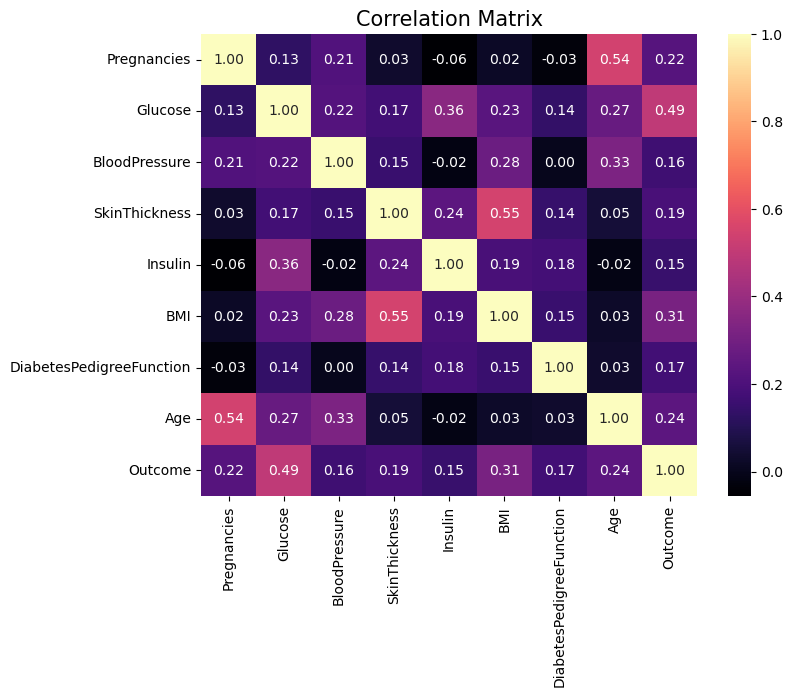

In [75]:
# Correlation matrix graph of the data set

f, ax = plt.subplots(figsize= [8,6])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=15)
plt.show()

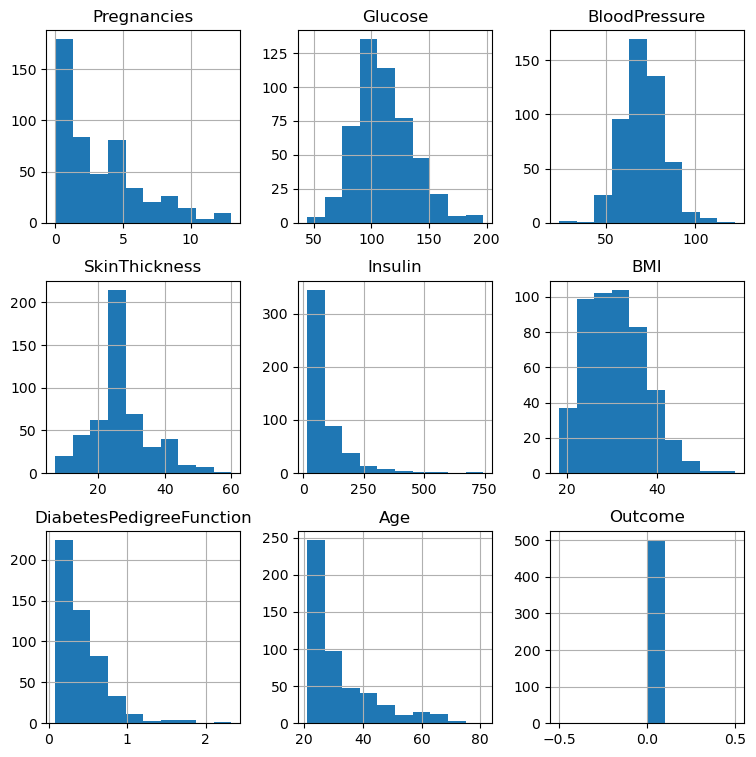

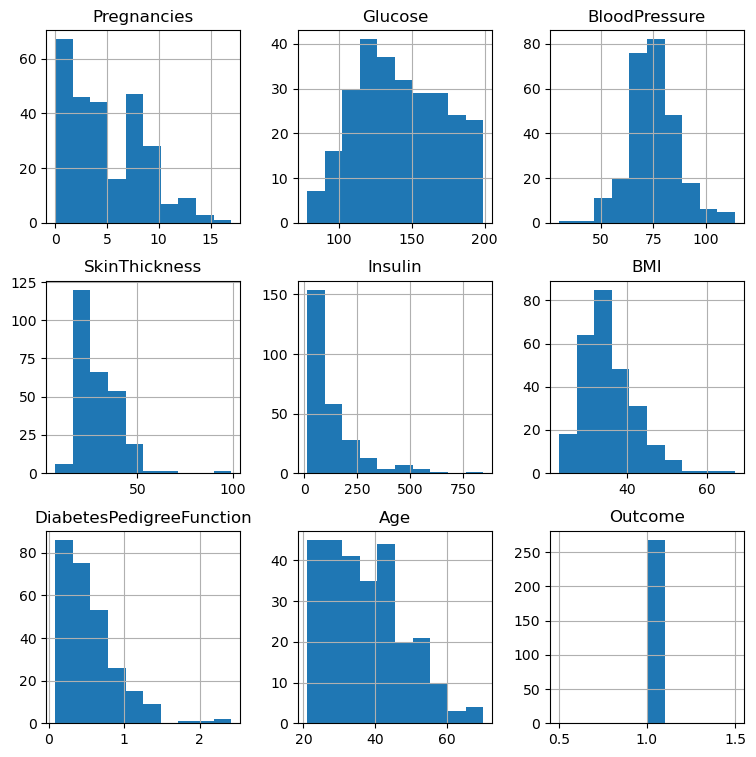

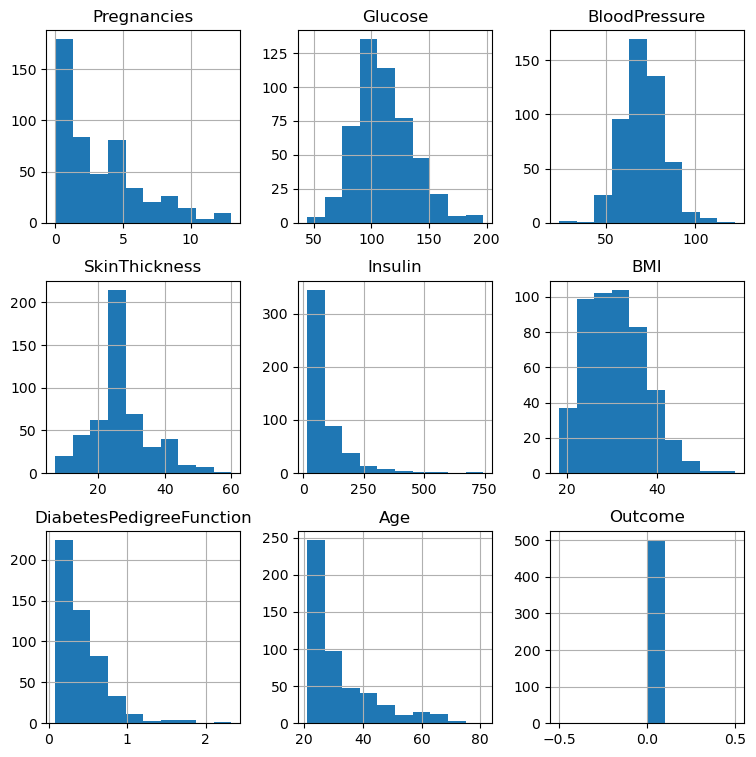

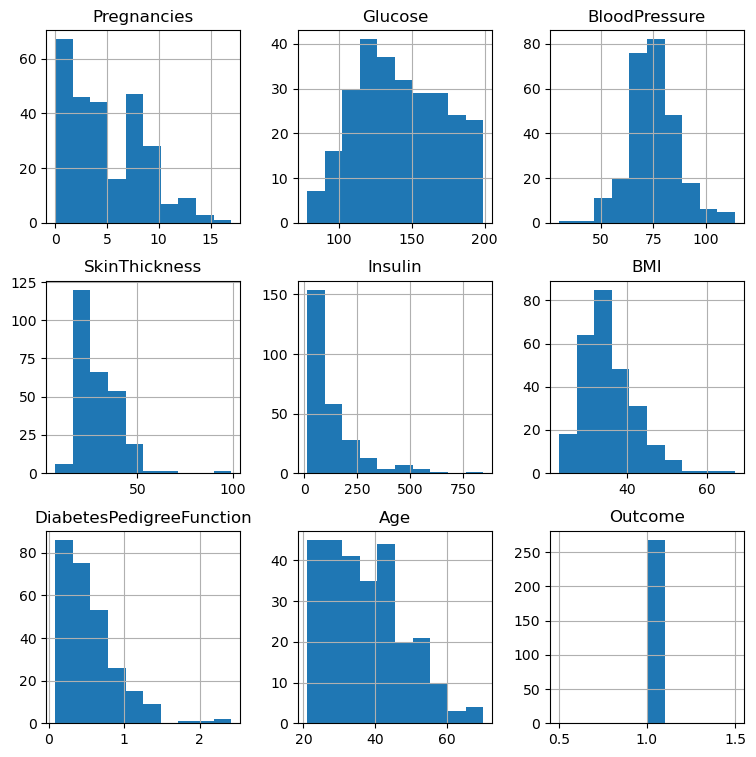

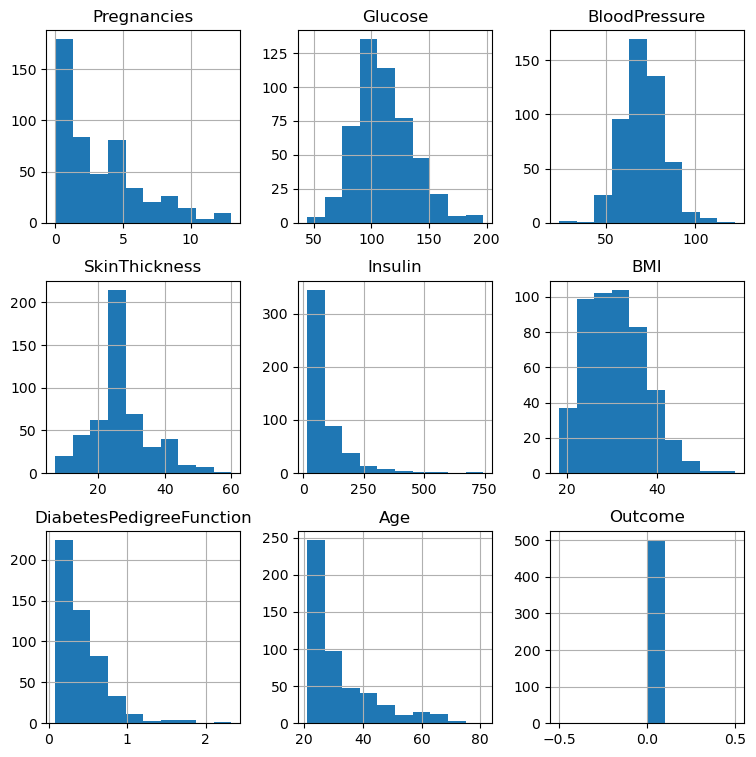

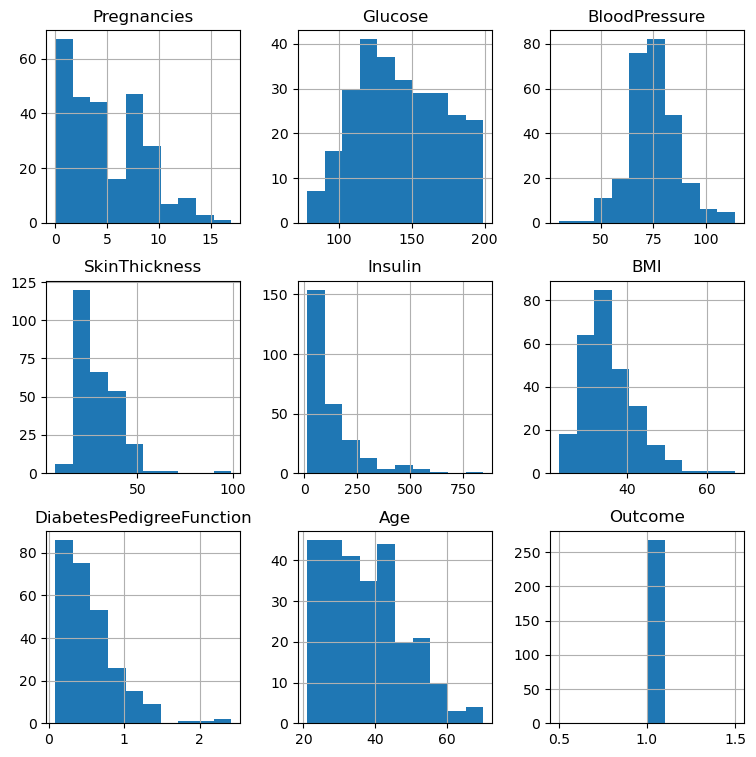

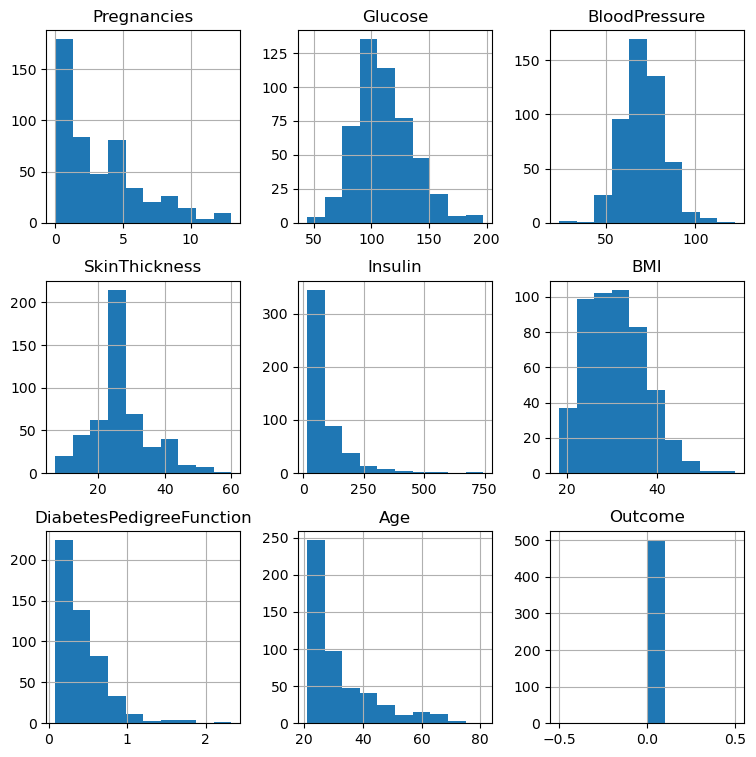

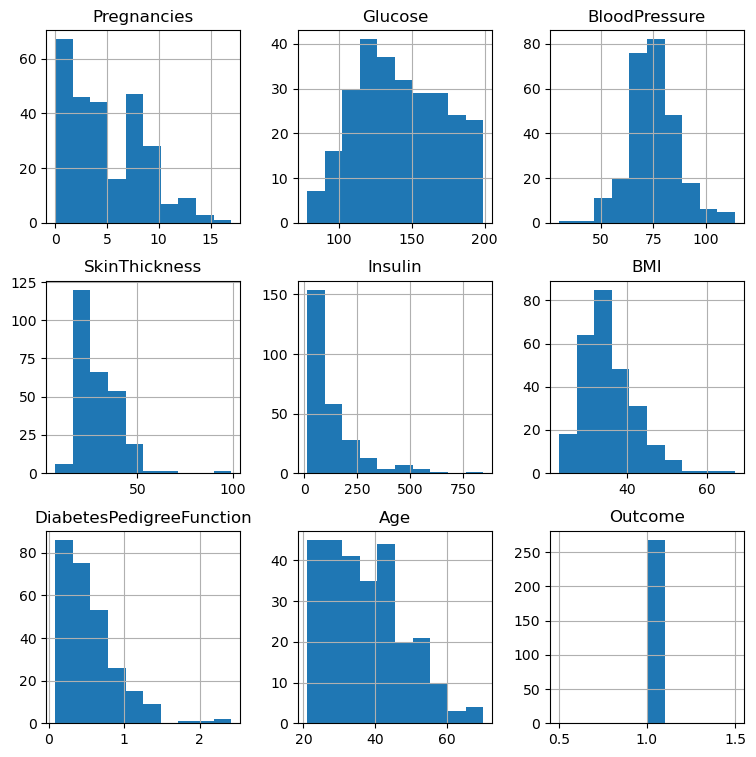

In [80]:
# Plotting the distributions in people with or without Diabetes 
data = df.groupby('Outcome')
data.hist(figsize=(9, 9))
plt.show()

In [82]:
# Calculate the average glucose level for individuals with and without diabetes

avg_glucose_diabetes = df[df['Outcome'] == 1]['Glucose'].mean()

avg_glucose_non_diabetes = df[df['Outcome'] == 0]['Glucose'].mean()

print(f"Average glucose level for individuals with diabetes: {avg_glucose_diabetes:.2f}")
print(f"Average glucose level for individuals without diabetes: {avg_glucose_non_diabetes:.2f}")

Average glucose level for individuals with diabetes: 142.16
Average glucose level for individuals without diabetes: 110.71


In [84]:
# Calculate the average BMI level for individuals without diabetes

avg_BMI_diabetes = df[df['Outcome'] == 1]['BMI'].mean()
avg_BMI_no_diabetes = df[df['Outcome'] == 0]['BMI'].mean()

print(f"Average BMI level for individuals with diabetes: {avg_BMI_diabetes:.2f}")
print(f"Average BMI level for individuals without diabetes: {avg_BMI_no_diabetes:.2f}")

Average BMI level for individuals with diabetes: 35.38
Average BMI level for individuals without diabetes: 30.88


In [85]:
# Calculate the average age of the dataset 

average_age = round(df['Age'].mean(),2)
print(average_age)

33.24


In [87]:
df.groupby("Outcome").agg({"Insulin": "mean"})

,Insulin
Outcome,
0,83.188000
1,116.041045


# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [94]:
# importing dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [95]:
# Sperating data and labels
X = df.drop(columns = 'Outcome', axis = 1)
Y = df['Outcome']

In [96]:
# Data Standardaization

scaler = StandardScaler()

In [97]:
scaler.fit(X)

StandardScaler()

In [98]:
Standardized_data = scaler.transform(X)
print(Standardized_data)

[[ 0.63994726  0.86527574 -0.0210444  ...  0.16725546  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20598931 -0.51658286 ... -0.85153454 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01597855 -0.68176235 ... -1.33182125  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02240928 -0.0210444  ... -0.90975111 -0.68519336
  -0.27575966]
 [-0.84488505  0.14197684 -1.01212132 ... -0.34213954 -0.37110101
   1.17073215]
 [-0.84488505 -0.94297153 -0.18622389 ... -0.29847711 -0.47378505
  -0.87137393]]


In [99]:
X = Standardized_data
Y = df['Outcome']

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state = 2)

In [105]:
print(X.shape, X_test.shape)

(768, 8) (154, 8)


In [106]:
classifier = svm.SVC(kernel = 'linear')

In [107]:
# training the support vector machine classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

# Model Evaluation
### Accuracy Score

In [108]:
#accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [109]:
X = Standardized_data
print("Accuracy Score of the trainig data: ", training_data_accuracy)

Accuracy Score of the trainig data:  0.7817589576547231


In [110]:
#accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [111]:
X = Standardized_data
print("Accuracy Score of the testing data: ", testing_data_accuracy)

Accuracy Score of the testing data:  0.7792207792207793


### Making a predictive system

In [112]:
input_data = (4,110,92,0,0,37.6,0.191,30)

#changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [113]:
# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)


[[ 0.04601433 -0.38405874  1.63075046 -2.96374541 -0.89735842  0.74942117
  -0.84827977 -0.27575966]]


C:\Users\talk2\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [114]:
# prediction
prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print("The person is not diabetic")
else: 
    print("The person is diabetic")

[0]
The person is not diabetic


# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

## In our research, we designed a system, which can predict diabetes with high accuracy.

## All models provided an accuracy greater than 70%. LR and SVM provided approximately 77%–78% accuracy for both train/test split.


## It is important to note that machine learning models are not perfect and may not always provide accurate predictions. It is also important to ensure that the data used to train the model is representative of the population being studied.

## # Comparing the three models we used, we have successfully built a machine learning model, specifically a Random Forest classifier,that exhibits a high level of accuracy in predicting.